# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
x = data.drop(columns=['MEDV'])
y = data['MEDV']

In [6]:
# Your code here :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size= 0.20, random_state=1)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [8]:
# Your code here :
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)
train_pred = l_reg.predict(x_train)
test_pred = l_reg.predict(x_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [14]:
# Your code here :
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error
train_r2 = r2_score(y_train,train_pred)
test_r2 = r2_score(y_test,test_pred)
print(f'train R2: {train_r2} test R2: {test_r2}')

train R2: 0.7293585058196337 test R2: 0.7634174432138452


## 4. Calculate and print mean squared error for both the training and the testing set.

In [12]:
# Your code here :
train_mse = mean_squared_error(y_train,train_pred)
test_mse = mean_squared_error(y_test,test_pred)
print(f'train MSE: {train_mse} test MSE: {test_mse}')

train MSE: 21.86279471487961 test MSE: 23.380836480270425


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [15]:
# Your code here :
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print(f'train MAE: {train_mae} test MAE: {test_mae}')

train MAE: 3.1961968073257454 test MAE: 3.7507121808389168


## Classification Model Evaluation

In [16]:
from sklearn.datasets import load_iris
data = load_iris()

In [17]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [18]:
column_names = data.feature_names

In [19]:
df = pd.DataFrame(data['data'],columns=column_names)

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
target = pd.DataFrame(data.target)

In [22]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [32]:
# Your code here :

x_c = df
y_c = data['target']
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x_c,y_c,test_size=0.20, random_state=41)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [33]:
# Your code here :
from sklearn.linear_model import LogisticRegression
l_r = LogisticRegression()
l_r.fit(X_trainset, y_trainset)
l_r.fit(X_trainset,y_trainset)
train_predict = l_r.predict(X_trainset)
test_predict = l_r.predict(X_testset)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [52]:
# Your code here :
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, confusion_matrix, f1_score


train_accuracy = accuracy_score(y_trainset, train_predict)
test_accuracy = accuracy_score(y_testset, test_predict)


print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9833
Testing Accuracy: 0.9333


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [ ]:
# Your code here :
train_balanced_accuracy = balanced_accuracy_score(y_trainset, train_predict)
test_balanced_accuracy = balanced_accuracy_score(y_testset,test_predict)

print(f"Training Balanced Accuracy: {train_balanced_accuracy:.4f}")
print(f"Testing Balanced Accuracy: {test_balanced_accuracy:.4f}")

Training Balanced Accuracy: 0.9831
Testing Balanced Accuracy: 0.9364


## 10. Calculate and print the precision score for both the training and the testing set.

In [ ]:
# Your code here :
train_precision = precision_score(y_trainset, train_predict,average='weighted')
test_precision = precision_score(y_testset, test_predict, average='weighted')


print(f"Training Precision: {train_precision:.4f}")
print(f"Testing Precision: {test_precision:.4f}")

Training Precision: 0.9833
Testing Precision: 0.9333


## 11. Calculate and print the recall score for both the training and the testing set.

In [ ]:
# Your code here :
train_recall = recall_score(y_trainset, train_predict, average="weighted")  
test_recall = recall_score(y_testset, test_predict, average="weighted")


print(f"Training Recall: {train_recall:.4f}")
print(f"Testing Recall: {test_recall:.4f}")

Training Recall: 0.9833
Testing Recall: 0.9333


## 12. Calculate and print the F1 score for both the training and the testing set.

In [ ]:
# Your code here :
train_f1 = f1_score(y_trainset, train_predict, average="weighted")
test_f1 = f1_score(y_testset, test_predict, average="weighted")


print(f"Training F1 Score: {train_f1:.4f}")
print(f"Testing F1 Score: {test_f1:.4f}")

Training F1 Score: 0.9833
Testing F1 Score: 0.9333


## 13. Generate confusion matrices for both the training and the testing set.

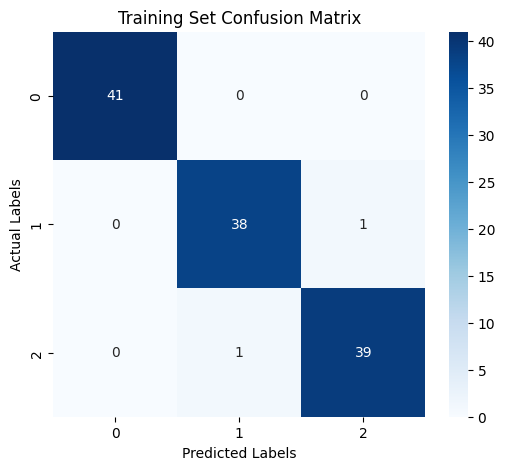

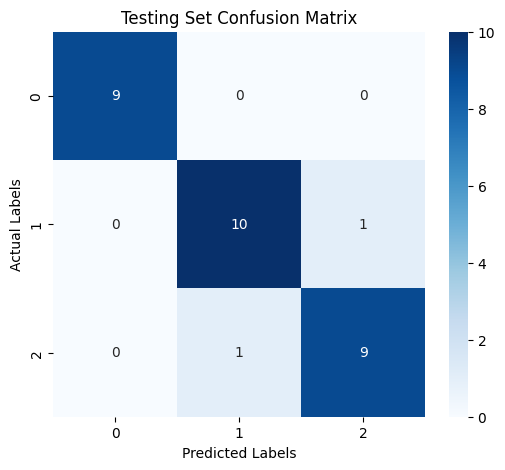

In [54]:
# Your code here :


import matplotlib.pyplot as plt
import seaborn as sns 

train_cm = confusion_matrix(y_trainset, train_predict)
test_cm = confusion_matrix(y_test, test_predict)


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=l_r.classes_, yticklabels=l_r.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(title)
    plt.show()


plot_confusion_matrix(train_cm, "Training Set Confusion Matrix")
plot_confusion_matrix(test_cm, "Testing Set Confusion Matrix")




## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !